## Differentiation
5.21: Electric field of a charge distribution:
Suppose we have a distribution of charges and we want to calculate the resulting electric field. One way to do this is to first calculate the electric potential φ and then take its gradient. For a point charge q at the origin, the electric potential at a distance r from the origin is

\Phi = {q\over{4\pi\epsilon_0 r}} 

and the electric field is E = −∇φ.

You have two charges, of ±1 C, 10 cm apart. Calculate the resulting electric potential on a 1 m × 1 m square plane surrounding the charges and passing through them. Calculate the potential at 1 cm spaced points in a grid and make a visualization on the screen of the potential using a density plot.
Now calculate the partial derivatives of the potential with respect to x and y and hence find the electric field in the xy plane. Make a visualization of the field also. This is a little trickier than visualizing the potential, because the electric field has both magnitude and direction. One way to do it might be to make two density plots, one for the magnitude, and one for the direction, the latter using the “hsv” color scheme in pylab, which is a rainbow scheme that passes through all the colors but starts and ends with the same shade of red, which makes it suitable for representing things like directions or angles that go around the full circle and end up where they started. A more sophisticated visualization might use the arrow object from the visual package, drawing a grid of arrows with direction and length chosen to represent the field.

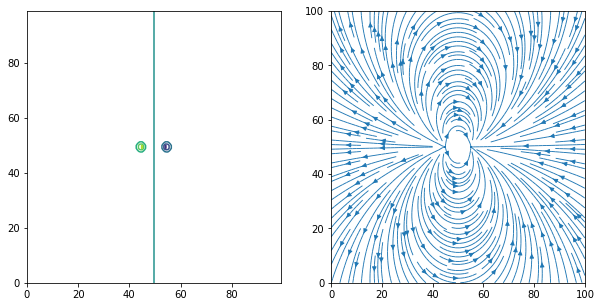

In [29]:
import numpy as np
import astropy.constants as c
import scipy.constants as cons
import matplotlib.pyplot as plt

# the charges
q1=1   #in Coulombs
q2=-1  # in Coulombs

# the potential
def V(q,distance): 
    return q/(4*np.pi*cons.epsilon_0*distance)

# the coordinate system and charge coordinates

x=np.linspace(0,100,100)
y=np.linspace(0,100,100)
x_coords, y_coords = np.meshgrid(x, y, indexing='xy')
p1_coord=[45,50]  # Point 1 coordinates, q1=1C
p2_coord=[55,50]  # Point 2 coordinates, q2=-1C


# The origin
origin=[0,0]

# Any other point
r=[x_coords,y_coords]


# r1=np.sqrt((p1_coord[1]-origin[1])**2 + (p1_coord[0]-origin[0])**2) # Distance from origin to first charge, q1=1C
# r2=np.sqrt((p2_coord[1]-origin[1])**2 + (p2_coord[0]-origin[0])**2) # Distance from origin to first charge, q2=-1C


r_1=np.sqrt((p1_coord[1]-r[1])**2 + (p1_coord[0]-r[0])**2) # Distance from first charge to any other point, q1=1C
r_2=np.sqrt((p2_coord[1]-r[1])**2 + (p2_coord[0]-r[0])**2) # Distance from second charge to any other point, q2=-1C

# The total potential of the two charges

V_tot = V(q1,r_1) + V(q2,r_2)

fig,[ax1, ax2]=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

#plt.plot(phi())
ax1.contour(V_tot)
#ax1.imshow(phi())


# The electric field

h=1e-5
const=4*np.pi*cons.epsilon_0
def distance(x,y):
    
    return np.sqrt((r[0]-x)**2 + (r[1]-y)**2) # Distance 

def E_x(q,x,y):
    
    return (q/const)*(-1/distance(x,y)**2)*(1/h)*(distance(x+h/2,y)-distance(x-h/2,y))

def E_y(q,x,y):
    
    return (q/const)*(-1/distance(x,y)**2)*(1/h)*(distance(x,y + h/2)-distance(x,y - h/2))

# Electric field x and y components for first charge
E1_x=E_x(q1,p1_coord[0],p1_coord[1])   
E1_y=E_y(q1,p1_coord[0],p1_coord[1])   

# Electric field x and y components for second charge
E2_x=E_x(q2,p2_coord[0],p2_coord[1])   
E2_y=E_y(q2,p2_coord[0],p2_coord[1])

E_x_tot= E1_x + E2_x # Electric field total in x direction
E_y_tot= E1_y + E2_y # Electric field total in y direction

ax2.streamplot(x_coords, y_coords, E_x_tot, E_y_tot, density=2.0, linewidth=.9, arrowsize=.9)
plt.show()


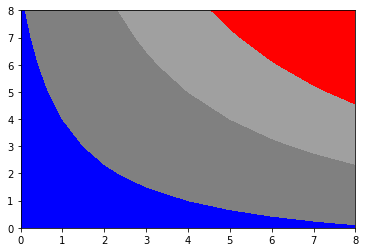

In [26]:

x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

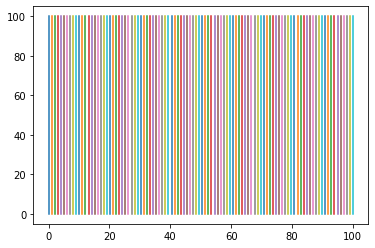

In [6]:
plt.plot(x_coords, y_coords)

In [87]:
x_coords, y_coords

(array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  1.01010101,   1.01010101,   1.01010101, ...,   1.01010101,
           1.01010101,   1.01010101],
        [  2.02020202,   2.02020202,   2.02020202, ...,   2.02020202,
           2.02020202,   2.02020202],
        ...,
        [ 97.97979798,  97.97979798,  97.97979798, ...,  97.97979798,
          97.97979798,  97.97979798],
        [ 98.98989899,  98.98989899,  98.98989899, ...,  98.98989899,
          98.98989899,  98.98989899],
        [100.        , 100.        , 100.        , ..., 100.        ,
         100.        , 100.        ]]),
 array([[  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
          98.98989899, 100.        ],
        [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
          98.98989899, 100.        ],
        [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
          98.98989899, 100.        ],
        ...,


In [98]:
phi()

array([[ 12694261.21988137,  13086156.99052623,  13490078.98118667, ...,
         13490078.98118667,  13086156.99052623,  12694261.21988137],
       [ 12818455.13448434,  13222428.13518243,  13639237.01732795, ...,
         13639237.01732795,  13222428.13518243,  12818455.13448434],
       [ 12938086.14322002,  13354319.54753132,  13784240.35077742, ...,
         13784240.35077742,  13354319.54753132,  12938086.14322002],
       ...,
       [-12938086.14322002, -13354319.54753132, -13784240.35077742, ...,
        -13784240.35077742, -13354319.54753132, -12938086.14322002],
       [-12818455.13448434, -13222428.13518243, -13639237.01732795, ...,
        -13639237.01732795, -13222428.13518243, -12818455.13448434],
       [-12694261.21988137, -13086156.99052623, -13490078.98118667, ...,
        -13490078.98118667, -13086156.99052623, -12694261.21988137]])

In [77]:
r2

74.33034373659252

In [74]:
p2_coord

[55, 50]

In [68]:
r_1

array([67.26812024, 65.84163892, 64.41524702, 62.9889506 , 61.56275629,
       60.13667137, 58.7107038 , 57.28486234, 55.85915666, 54.43359743,
       53.00819645, 51.58296685, 50.15792324, 48.73308193, 47.3084612 ,
       45.8840816 , 44.4599663 , 43.03614154, 41.61263715, 40.18948716,
       38.76673061, 37.34441246, 35.9225848 , 34.50130826, 33.08065387,
       31.66070538, 30.24156224, 28.82334339, 27.40619232, 25.99028371,
       24.57583231, 23.16310505, 21.75243789, 20.34425936, 18.93912458,
       17.53776516, 16.14116446, 14.75067421, 13.36820127, 11.99651771,
       10.63979723,  9.30458755,  8.0016642 ,  6.74975012,  5.58326423,
        4.56812528,  3.82673672,  3.53571427,  3.79998067,  4.52323413,
        5.52816941,  6.68901214,  7.93765242,  9.23855966, 10.57245759,
       11.92828364, 13.29933299, 14.68134127, 16.07148161, 17.4678126 ,
       18.86895994, 20.27392507, 21.68196583, 23.09251963, 24.50515251,
       25.91952455, 27.33536578, 28.75245916, 30.17062826, 31.58

In [75]:
r_2

array([74.33034374, 72.90349372, 71.47670955, 70.04999526, 68.62335522,
       67.19679413, 65.77031716, 64.34392988, 62.9176384 , 61.49144938,
       60.06537013, 58.63940865, 57.21357375, 55.78787513, 54.36232352,
       52.93693079, 51.51171012, 50.08667622, 48.66184549, 47.23723631,
       45.81286935, 44.38876793, 42.96495845, 41.54147093, 40.11833964,
       38.69560389, 37.27330897, 35.85150734, 34.43026012, 33.00963892,
       31.5897282 , 30.17062826, 28.75245916, 27.33536578, 25.91952455,
       24.50515251, 23.09251963, 21.68196583, 20.27392507, 18.86895994,
       17.4678126 , 16.07148161, 14.68134127, 13.29933299, 11.92828364,
       10.57245759,  9.23855966,  7.93765242,  6.68901214,  5.52816941,
        4.52323413,  3.79998067,  3.53571427,  3.82673672,  4.56812528,
        5.58326423,  6.74975012,  8.0016642 ,  9.30458755, 10.63979723,
       11.99651771, 13.36820127, 14.75067421, 16.14116446, 17.53776516,
       18.93912458, 20.34425936, 21.75243789, 23.16310505, 24.57

In [53]:
np.meshgrid(range(101), range(101), indexing='xy')



[array([[  0,   1,   2, ...,  98,  99, 100],
        [  0,   1,   2, ...,  98,  99, 100],
        [  0,   1,   2, ...,  98,  99, 100],
        ...,
        [  0,   1,   2, ...,  98,  99, 100],
        [  0,   1,   2, ...,  98,  99, 100],
        [  0,   1,   2, ...,  98,  99, 100]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [ 98,  98,  98, ...,  98,  98,  98],
        [ 99,  99,  99, ...,  99,  99,  99],
        [100, 100, 100, ..., 100, 100, 100]])]

In [63]:
r

[array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
          4.04040404,   5.05050505,   6.06060606,   7.07070707,
          8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
         12.12121212,  13.13131313,  14.14141414,  15.15151515,
         16.16161616,  17.17171717,  18.18181818,  19.19191919,
         20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
         24.24242424,  25.25252525,  26.26262626,  27.27272727,
         28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
         32.32323232,  33.33333333,  34.34343434,  35.35353535,
         36.36363636,  37.37373737,  38.38383838,  39.39393939,
         40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
         44.44444444,  45.45454545,  46.46464646,  47.47474747,
         48.48484848,  49.49494949,  50.50505051,  51.51515152,
         52.52525253,  53.53535354,  54.54545455,  55.55555556,
         56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
         60.60606061,  61.61616162,  62.

In [65]:
np.meshgrid(x, y, indexing='xy')

[array([[  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
          98.98989899, 100.        ],
        [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
          98.98989899, 100.        ],
        [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
          98.98989899, 100.        ],
        ...,
        [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
          98.98989899, 100.        ],
        [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
          98.98989899, 100.        ],
        [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
          98.98989899, 100.        ]]),
 array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  1.01010101,   1.01010101,   1.01010101, ...,   1.01010101,
           1.01010101,   1.01010101],
        [  2.02020202,   2.02020202,   2.02020202, ...,   2.02020202,
           2.02020202,   2.02020202],
        ...,


In [67]:
x=range(101)

In [ ]:
# Potential of the first charge, q=1C -->check the units later
V1=V(1,r1)

# Potential of the second charge, q=-1C -->check the units later
V2=V(-1,r1)

# Add the potential of the two charges
V_final=V1 + V2

In [44]:
V_final

0.0

In [41]:
V2

-133607892.72561912

In [42]:
V1

133607892.72561912

In [35]:
r2

73.59347797189639

In [33]:
r1

67.26812023536856

In [28]:
x_coords

array([[  0,   1,   2, ...,  98,  99, 100],
       [  0,   1,   2, ...,  98,  99, 100],
       [  0,   1,   2, ...,  98,  99, 100],
       ...,
       [  0,   1,   2, ...,  98,  99, 100],
       [  0,   1,   2, ...,  98,  99, 100],
       [  0,   1,   2, ...,  98,  99, 100]])

In [29]:
y_coords

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [ 98,  98,  98, ...,  98,  98,  98],
       [ 99,  99,  99, ...,  99,  99,  99],
       [100, 100, 100, ..., 100, 100, 100]])

In [21]:
i_coords, j_coords = np.meshgrid(range(100), range(100), indexing='ij')


In [22]:
i_coords

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [97, 97, 97, ..., 97, 97, 97],
       [98, 98, 98, ..., 98, 98, 98],
       [99, 99, 99, ..., 99, 99, 99]])